---

# IML - Homework 1

### *Agata Pałdyna*

---

## Mushroom Classification

---

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

---

### Read data

In [2]:
data = pd.read_csv(".\mushrooms.csv")

---

### Explore data

In [3]:
# First few rows of data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
# Data dimensions
data_shape = data.shape
data_shape

(8124, 22)

In [4]:
# Check variables' types and if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [ ]:
# There are no missing values :)

In [ ]:
# All variables are character

In [5]:
# Number of unique values in each variable
data.nunique().sort_values(ascending = False)

gill-color                  12
cap-color                   10
spore-print-color            9
odor                         9
stalk-color-below-ring       9
stalk-color-above-ring       9
habitat                      7
population                   6
cap-shape                    6
stalk-root                   5
ring-type                    5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
veil-color                   4
cap-surface                  4
ring-number                  3
stalk-shape                  2
gill-size                    2
gill-spacing                 2
gill-attachment              2
bruises                      2
class                        2
veil-type                    1
dtype: int64

In [ ]:
# All variables are categorical

In [6]:
# Variable 'veil-type' has only one value, so I won't use it 
data.drop(["veil-type"], axis = 1, inplace = True)

In [7]:
# Check top value for each variable and its frequency
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


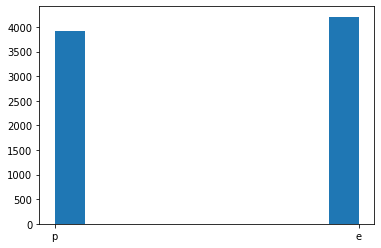

In [8]:
# Check histogram of 'class' variable values
plt.hist(data["class"])
plt.show()

In [9]:
# Check class sizes
class_counts = data["class"].value_counts()
class_counts

e    4208
p    3916
Name: class, dtype: int64

In [12]:
# Check percentage of each class

d = {"e": "edible", "p": "poisonous"}

for item in d.items():
    print("class =", item[1], ": ", 100 * class_counts[item[0]] / data_shape[0], "%")

class = edible :  51.7971442639094 %
class = poisonous :  48.2028557360906 %


In [ ]:
# Conclusion: classes are not unbalanced

---

### Divide data into features X and target y

In [13]:
# Divide data into X and y
X = data.drop(["class"], axis = 1)
y = data["class"]

In [14]:
# Convert target to binary target: 1 - edible, 0 - poisonous
y = pd.Series(np.where(y == "e", 1, 0))

---

### One - hot encoding

In [ ]:
# Because all features are character, categorical and they are not ordered, I'm going to use one-hot encoding

In [15]:
X = pd.get_dummies(X)

In [16]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
X.shape

(8124, 116)

---

### Check correlations

In [18]:
pd.set_option("display.max_rows", 116)

In [19]:
# Check correlation between features and target
corr_X_y = pd.DataFrame(X.apply(lambda x: x.corr(y))).rename(columns = {0: "corr"})
corr_X_y.sort_values(by = "corr")

,corr
odor_f,-0.623842
stalk-surface-above-ring_k,-0.587658
stalk-surface-below-ring_k,-0.573524
gill-size_n,-0.540024
gill-color_b,-0.538808
bruises_f,-0.501530
spore-print-color_h,-0.490229
ring-type_l,-0.451619
population_v,-0.443722
spore-print-color_w,-0.357384


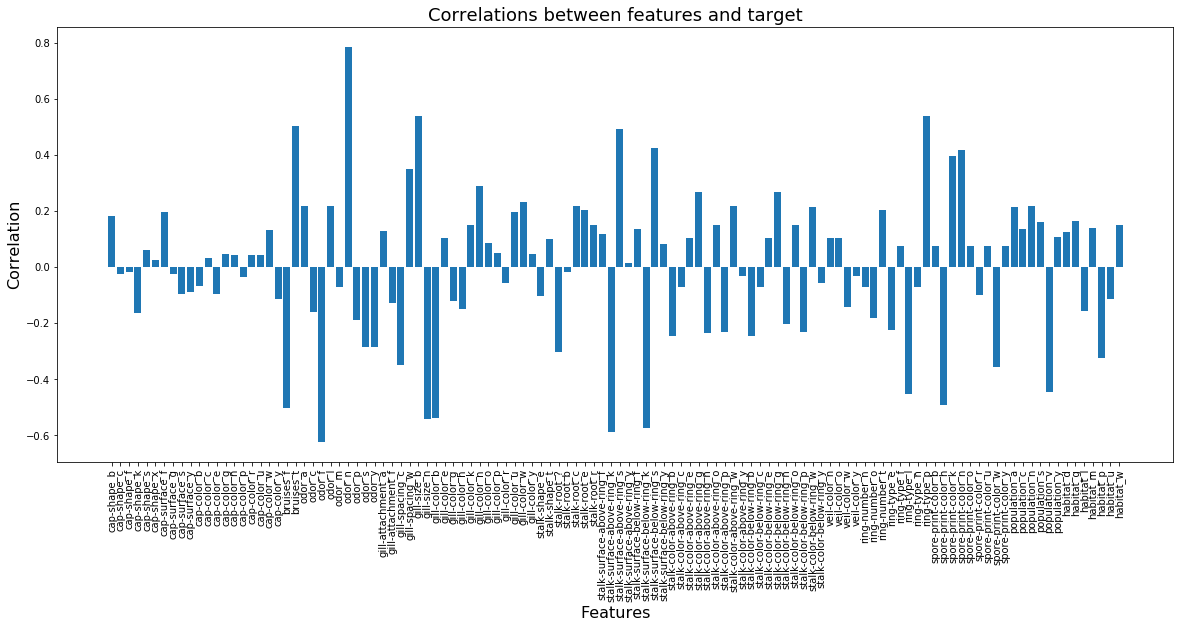

In [20]:
# Plot of correlations
x_vals = corr_X_y.index.values
y_vals = corr_X_y["corr"].values

plt.figure(figsize = (20, 8))
plt.bar(x_vals, y_vals)
plt.xticks(rotation = "vertical")
plt.title("Correlations between features and target", size = 18)
plt.xlabel("Features", size = 16)
plt.ylabel("Correlation", size = 16)
plt.show()

In [21]:
# Check base statistics of correlations values
corr_X_y.describe()

,corr
count,116.000000
mean,0.005285
std,0.253692
min,-0.623842
25%,-0.132035
50%,0.043607
75%,0.150087
max,0.785557


In [25]:
# Most important features
corr_X_y.query("corr >= 0.6 or corr <= -0.6").index.values

array(['odor_f', 'odor_n'], dtype=object)

In [26]:
# Get names of variables with highest corr
features_names_highest_corr = corr_X_y.query("corr >= 0.5 or corr <= -0.5").index.values
features_names_highest_corr

array(['bruises_f', 'bruises_t', 'odor_f', 'odor_n', 'gill-size_b',
       'gill-size_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k', 'ring-type_p'], dtype=object)

---

### Build some base models

#### 1) on all variables

In [44]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)


# Check class sizes and percentage of each class

print("y_train")
class_counts = y_train.value_counts()
for i in range(0, 2):
    print(i, ":", class_counts[i], ", ", 100 * class_counts[i] / X_train.shape[0], "%")

print("\n")

print("y_test")
class_counts = y_test.value_counts()
for i in range(0, 2):
    print(i, ":", class_counts[i], ", ", 100 * class_counts[i] / X_test.shape[0], "%")

y_train
0 : 2749 ,  48.346816742877245 %
1 : 2937 ,  51.653183257122755 %


y_test
0 : 1167 ,  47.86710418375718 %
1 : 1271 ,  52.13289581624282 %


In [ ]:
# Classes still are not unbalanced

In [ ]:
# Now I'm going to build some base models, i.e. models with default parameters values

In [39]:
def model_prediction_accuracy(clf, X_train, X_test, y_train, y_test):
    """
    Function trains given model with given train data, 
    makes prediction on given test data
    and counts and prints measures Accuracy
    """
    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    

    
def model_prediction_measures(clf, X_train, X_test, y_train, y_test):
    """
    Function trains given model with given train data, 
    makes prediction on given test data
    and counts and prints measures Acc, Prec, Recall, F1 and AUC
    """
    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1: ", f1_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))

In [56]:
# Logistic regression
clf_LR = LogisticRegression()
model_prediction_measures(clf_LR, X_train, X_test, y_train, y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
AUC:  1.0


C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
# Decision Tree
clf_DT = tree.DecisionTreeClassifier()
model_prediction_measures(clf_DT, X_train, X_test, y_train, y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
AUC:  1.0


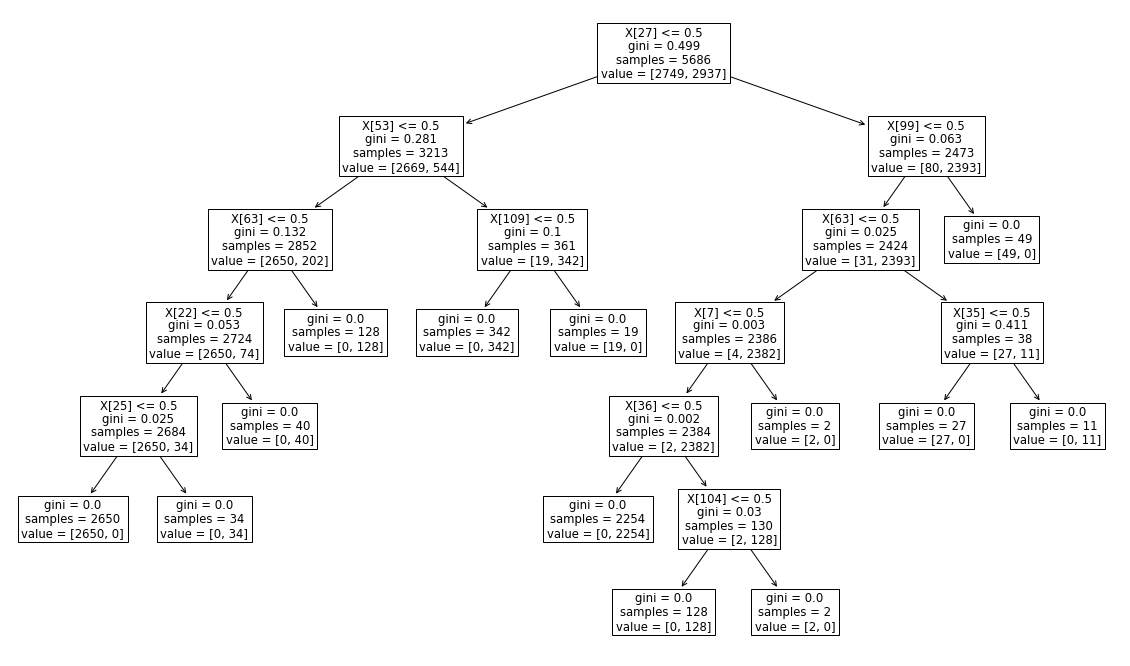

In [48]:
# Plot tree
plt.figure(figsize = (20, 12))
tree.plot_tree(clf_DT) 
plt.show()

In [49]:
# Random Forest
clf_RF = RandomForestClassifier()
model_prediction_measures(clf_RF, X_train, X_test, y_train, y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
AUC:  1.0


C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
# AdaBoost
clf_AB = AdaBoostClassifier()
model_prediction_measures(clf_AB, X_train, X_test, y_train, y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
AUC:  1.0


In [51]:
# SVM
clf_SVM = svm.SVC()
model_prediction_measures(clf_SVM, X_train, X_test, y_train, y_test)

C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  0.9975389663658737
Precision:  0.995301487862177
Recall:  1.0
F1:  0.9976452119309263
AUC:  0.9974293059125964


In [ ]:
# Looking at measures values, all models seems to be good (the worst of them, but still good, is SVM)

#### 2) on variables selected based on correlations

In [27]:
# Split data into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[features_names_highest_corr], y, test_size = 0.3, random_state = 123)


# Check class sizes and percentage of each class

print("y_train")
class_counts = y_train2.value_counts()
for i in range(0, 2):
    print(i, ":", class_counts[i], ", ", 100 * class_counts[i] / X_train2.shape[0], "%")

print("\n")

print("y_test")
class_counts = y_test2.value_counts()
for i in range(0, 2):
    print(i, ":", class_counts[i], ", ", 100 * class_counts[i] / X_test2.shape[0], "%")

y_train
0 : 2749 ,  48.346816742877245 %
1 : 2937 ,  51.653183257122755 %


y_test
0 : 1167 ,  47.86710418375718 %
1 : 1271 ,  52.13289581624282 %


In [30]:
# Logistic regression
clf_LR2 = LogisticRegression()
model_prediction_measures(clf_LR2, X_train2, X_test2, y_train2, y_test2)

Accuracy:  0.9790812141099262
Precision:  0.9773082942097027
Recall:  0.982690794649882
F1:  0.9799921537857983
AUC:  0.9789203759024903


C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# Decision Tree
clf_DT2 = tree.DecisionTreeClassifier()
model_prediction_measures(clf_DT2, X_train2, X_test2, y_train2, y_test2)

Accuracy:  0.9807219031993437
Precision:  0.9803767660910518
Recall:  0.982690794649882
F1:  0.9815324165029469
AUC:  0.9806341719607593


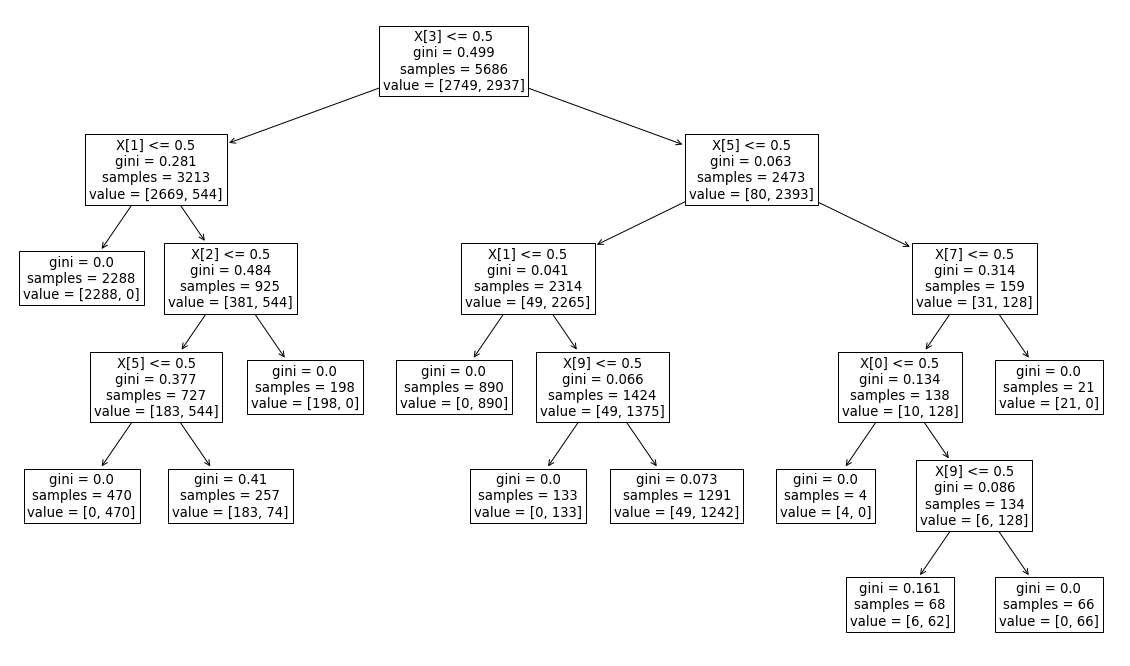

In [32]:
# Plot tree
plt.figure(figsize = (20, 12))
tree.plot_tree(clf_DT2) 
plt.show()

In [33]:
# Random Forest
clf_RF2 = RandomForestClassifier()
model_prediction_measures(clf_RF2, X_train2, X_test2, y_train2, y_test2)

Accuracy:  0.9807219031993437
Precision:  0.9803767660910518
Recall:  0.982690794649882
F1:  0.9815324165029469
AUC:  0.9806341719607593


C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
# AdaBoost
clf_AB2 = AdaBoostClassifier()
model_prediction_measures(clf_AB2, X_train2, X_test2, y_train2, y_test2)

Accuracy:  0.9737489745693191
Precision:  0.9674670797831139
Recall:  0.982690794649882
F1:  0.9750195160031225
AUC:  0.9733505387131157


In [35]:
# AdaBoost
# for x in [0.001, 0.01, 0.05, 0.074, 0.075, 0.08, 0.085, 0.09, 0.1]:   # tests of 'n_estimators' parameter => 14
# for x in [0.001, 0.01, 0.05, 0.07, 0.074, 0.075, 0.08, 0.085, 0.09, 0.1]:   # tests of 'learing_rate' parameter => 0.074
for x in ['SAMME.R', 'SAMME']:  # tests of 'algorithm' parameter => SAMME.R (default)
    clf_AB2 = AdaBoostClassifier(n_estimators = 14, learning_rate = 0.074, algorithm = x)
    model_prediction_measures(clf_AB2, X_train2, X_test2, y_train2, y_test2)

Accuracy:  0.9745693191140279
Precision:  0.9689681923972071
Recall:  0.982690794649882
F1:  0.97578125
AUC:  0.9742074367422503
Accuracy:  0.8785890073831009
Precision:  0.9620853080568721
Recall:  0.7985837922895358
F1:  0.8727429062768701
AUC:  0.8821539355620772


In [36]:
# AdaBoost
clf_AB2 = AdaBoostClassifier(n_estimators = 14, learning_rate = 0.074)
model_prediction_measures(clf_AB2, X_train2, X_test2, y_train2, y_test2)

Accuracy:  0.9745693191140279
Precision:  0.9689681923972071
Recall:  0.982690794649882
F1:  0.97578125
AUC:  0.9742074367422503


In [37]:
# SVM
clf_SVM2 = svm.SVC()
model_prediction_measures(clf_SVM2, X_train2, X_test2, y_train2, y_test2)

C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  0.9807219031993437
Precision:  0.9803767660910518
Recall:  0.982690794649882
F1:  0.9815324165029469
AUC:  0.9806341719607593


In [38]:
# Looking at measures values, all models are quite worse than these built on all variables,
# but they still seems to be good (all measures are about 0.98)
#
# As we can see, models Decission Tree, Random Forest and SVM has the same values of measures

---

### Build a model

In [ ]:
# It is quite strange that models built in previous section in point 1) has Accuracy, 
# Precision, Recall, etc., equal to 1. In my opinion it comes out suspicious 
# but I'm not sure where this result came from.
# 
# Therefore, I will build model on variables selected based on correlations,
# let it be Random Forest.

In [52]:
# Test parameters

# for x in [1, 2, 3, 5, 8, 10, 15, 20, 30]:  # tests of 'n_estimators' parameter => Acc didn't change - let it be default
# for x in [1, 2, 3, 4, 5, 8, 10, 15, 20, 30]:  # tests of 'max_depth' parameter => 4
for x in [1, 2, 3, 4, 5, 8, 10, 15]:  # tests of 'min_samples_leaf' parameter => 1 (default)
    clf = RandomForestClassifier(#n_estimators = x,  
                                 max_depth = 4, 
                                 #min_samples_leaf = x, 
                                 random_state = 123)
    model_prediction_accuracy(clf, X_train2, X_test2, y_train2, y_test2)

C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Accuracy:  0.9807219031993437
Accuracy:  0.9762100082034455
Accuracy:  0.9762100082034455
Accuracy:  0.9745693191140279
Accuracy:  0.9790812141099262
Accuracy:  0.9790812141099262
Accuracy:  0.9790812141099262
Accuracy:  0.9745693191140279


C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [53]:
# Train model
clf = RandomForestClassifier(max_depth = 4, random_state = 123)
clf = clf.fit(X, y)

C:\Users\aga71\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
# Save traind model in file
pickle.dump(clf, open(".\MushroomClassifier.pickle", "wb"))

---